This project explores unsupervised Machine Learning algorithm on image clustering using the facets dataset. The Kmeans, Agglomerative Clustering and DBSCAN were used on the Wild Dataset 

In [3]:
from sklearn.datasets import fetch_lfw_people

# Load the dataset
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

# Access data and labels
X = lfw_people.data           # Feature data (flattened pixel values of images)
y = lfw_people.target         # Labels (person ID)
image_shape = lfw_people.images[0].shape
target_names = lfw_people.target_names  # List of person names

# Check data shape
print("Images shape:", lfw_people.images.shape)
print("Data shape:", X.shape)
print("Number of classes:", len(target_names))
print(target_names)

Images shape: (1288, 50, 37)
Data shape: (1288, 1850)
Number of classes: 7
['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Tony Blair']


In [4]:
import numpy as np 
from sklearn.cluster import DBSCAN
dbscan = DBSCAN()
labels = dbscan.fit_predict(X)
print("Unique labels: {}".format(np.unique(labels)))


# we see that all the labels returned -1, so all the data was labelled as noise by DBSCAN. 
# I need to set the min_samples and eps parameter to better capture the data.

Unique labels: [-1]


In [5]:
dbscan = DBSCAN(min_samples=3, eps=7)
labels = dbscan.fit_predict(X)
print("Unique labels: {}".format(np.unique(labels)))


# We can see that by specifying the parameter, we have a single cluster and noise points 

Unique labels: [-1  0]


In [6]:
# Count number of points in all clusters and noise.
# bincount doesn't allow negative numbers, so we need to add 1.
# The first number in the result corresponds to noise points.
print("Number of points per cluster: {}".format(np.bincount(labels + 1)))


#35 points are noise while 1253 is the cluster 


Number of points per cluster: [  35 1253]


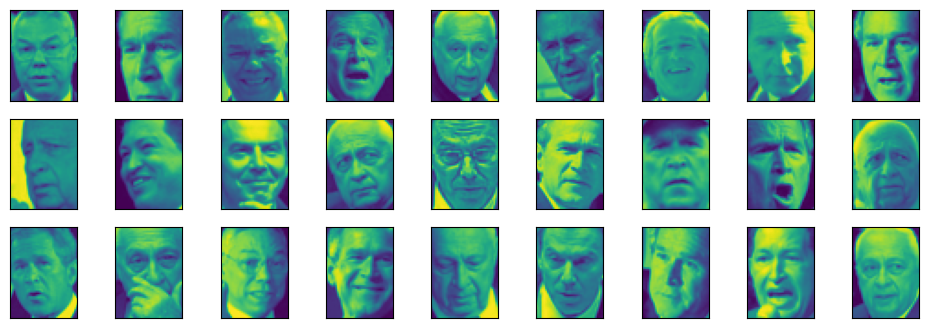

In [7]:
import matplotlib.pyplot as plt

noise = X[labels==-1]
fig, axes = plt.subplots(3, 9, subplot_kw={'xticks': (), 'yticks': ()},
 figsize=(12, 4))
for image, ax in zip(noise, axes.ravel()):
 ax.imshow(image.reshape(image_shape), vmin=0, vmax=1)
 
 
#we can see that the these images are classified as noise either due to orientation, strange expression and reactions 

In [8]:
for eps in [1, 3, 5, 7, 9, 11, 13]:
 print("\neps={}".format(eps))
 dbscan = DBSCAN(eps=eps, min_samples=3)
 labels = dbscan.fit_predict(X)
 print("Clusters present: {}".format(np.unique(labels)))
 print("Cluster sizes: {}".format(np.bincount(labels + 1)))

# Here we try to a sensitivity on the parameters to see the output of the clusters. 
#Fow Low eps values, all points are labelled as noise. Interesting for eps 5. #we get many noise points and many clusters


eps=1
Clusters present: [-1]
Cluster sizes: [1288]

eps=3
Clusters present: [-1]
Cluster sizes: [1288]

eps=5
Clusters present: [-1  0  1  2  3  4  5  6  7  8  9]
Cluster sizes: [647   4 610   3   3   3   4   5   3   3   3]

eps=7
Clusters present: [-1  0]
Cluster sizes: [  35 1253]

eps=9
Clusters present: [-1  0]
Cluster sizes: [   1 1287]

eps=11
Clusters present: [0]
Cluster sizes: [   0 1288]

eps=13
Clusters present: [0]
Cluster sizes: [   0 1288]


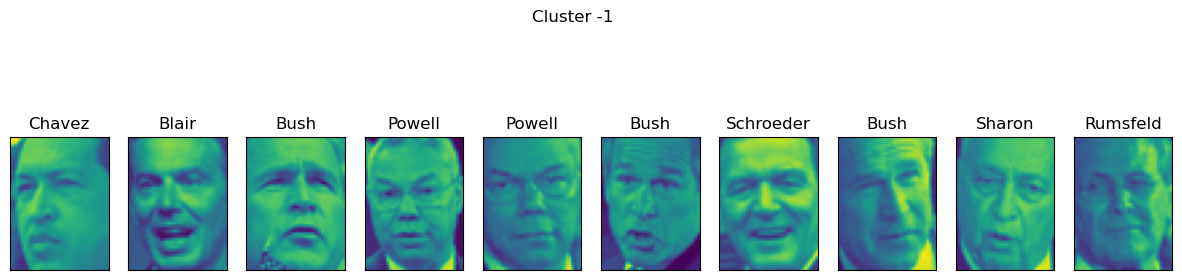

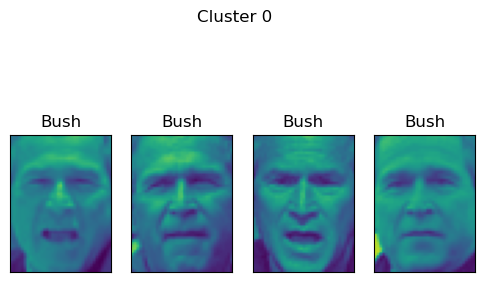

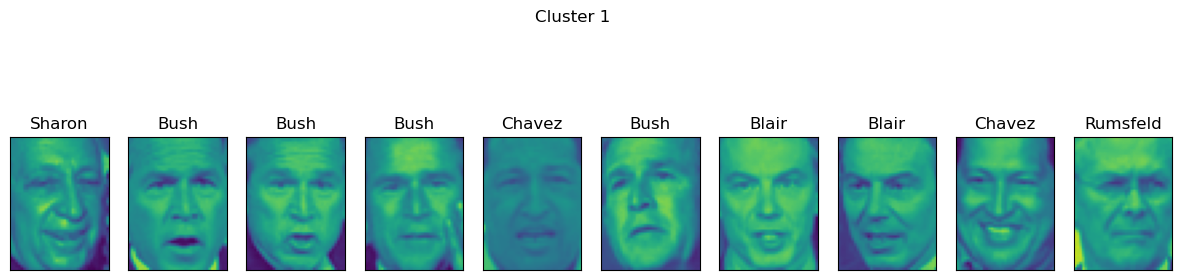

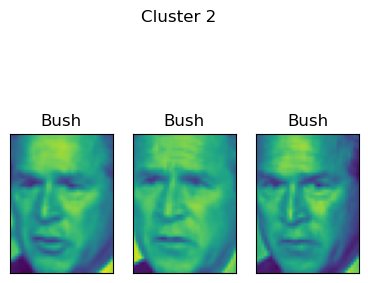

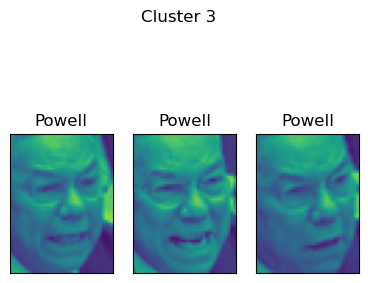

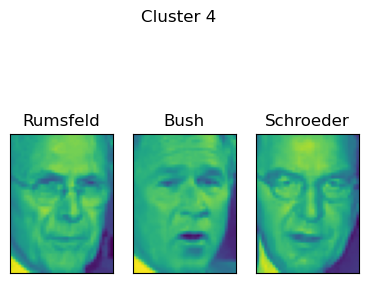

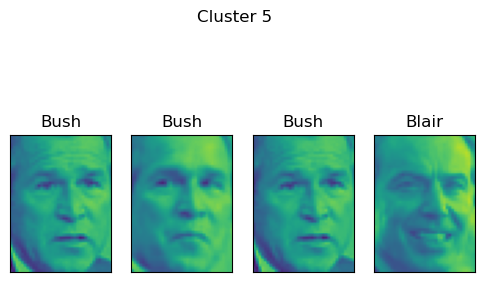

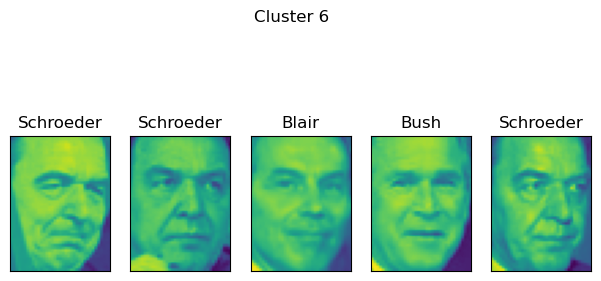

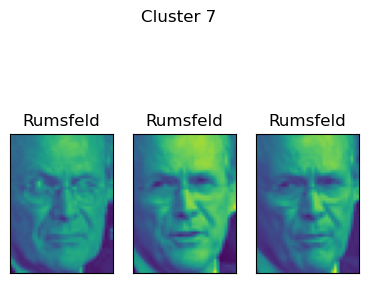

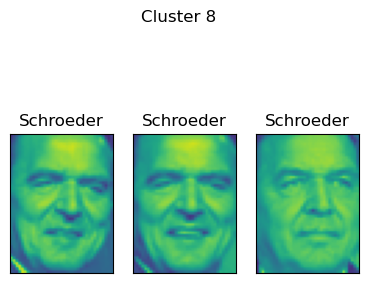

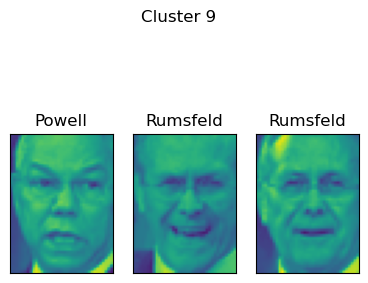

In [9]:
# Zooming in on eps 5 
#Some of the clusters are based on similar orientation, facial expression , very distinct faces 

# Run DBSCAN clustering
dbscan = DBSCAN(min_samples=3, eps=5)
labels = dbscan.fit_predict(X)

# Define the maximum number of images to display per cluster
max_images = 10

# Loop through each unique cluster label, including -1 (noise points)
for cluster in np.unique(labels):
    mask = labels == cluster
    n_images = min(np.sum(mask), max_images)  # Display up to max_images per cluster

    # Skip empty clusters
    if n_images == 0:
        continue

    # Creating a new figure for each cluster
    fig, axes = plt.subplots(1, n_images, figsize=(n_images * 1.5, 4),
                             subplot_kw={'xticks': (), 'yticks': ()})

    # If there is only one image, `axes` won't be an array, so we handle that case
    if n_images == 1:
        axes = [axes]

    # Display each image in the cluster
    for image, label, ax in zip(X[mask][:max_images], y[mask][:max_images], axes):
        ax.imshow(image.reshape(image_shape), vmin=0, vmax=1)
        ax.set_title(lfw_people.target_names[label].split()[-1])

    plt.suptitle(f'Cluster {cluster}')
    plt.show()


I am using manual inspection to access the output of the DBSCAN algorithm which in many real life scenario. This would be the case, unlike the some of the metrics used for supervised and unsupervised learning. 

Analyzing the faces dataset with K-means 

In [10]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=10, random_state=0)
labels_km = km.fit_predict(X)
print("Cluster sizes k-means: {}".format(np.bincount(labels_km)))

Cluster sizes k-means: [123 117  98  81 180  91 120 168 178 132]


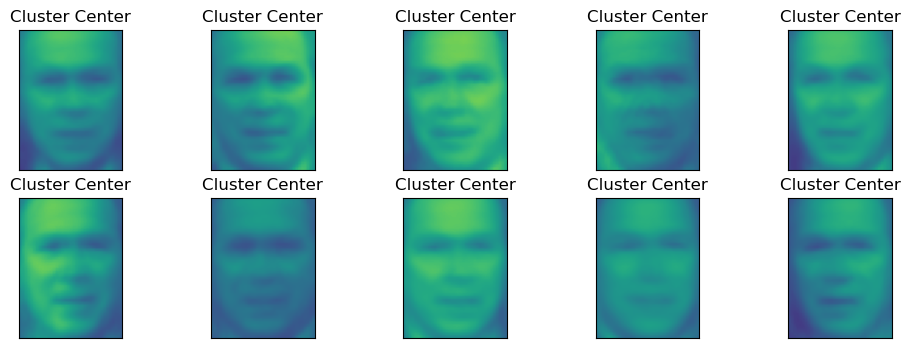

In [11]:
# Assuming `image_shape` represents the shape of each image (e.g., 50x37)
fig, axes = plt.subplots(2, 5, subplot_kw={'xticks': (), 'yticks': ()}, figsize=(12, 4))

# Plot each cluster center
for center, ax in zip(km.cluster_centers_, axes.ravel()):
    ax.imshow(center.reshape(image_shape), vmin=0, vmax=1)
    ax.set_title("Cluster Center")

plt.show()

# As you can see Kmeans partition is a relatively similar sized clusters from 81 to 178. Which is different from the DBSCAN. 


In [12]:
pip install mglearn


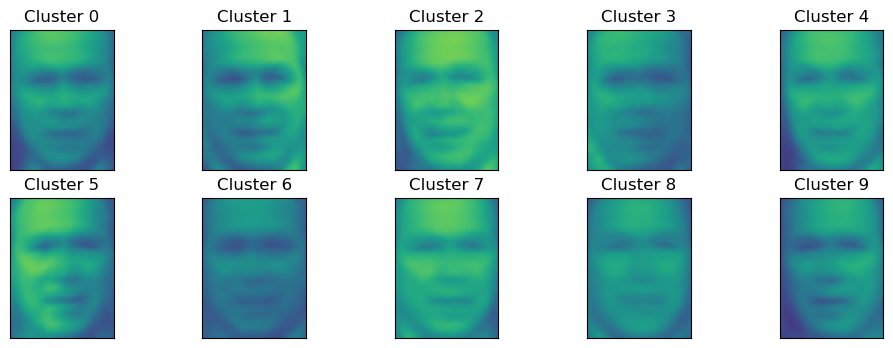

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming km is your trained KMeans model, X is the dataset, y are the labels, and image_shape is known
fig, axes = plt.subplots(2, 5, subplot_kw={'xticks': (), 'yticks': ()}, figsize=(12, 4))

# Plot the cluster centers as representative faces
for i, (center, ax) in enumerate(zip(km.cluster_centers_, axes.ravel())):
    ax.imshow(center.reshape(image_shape), vmin=0, vmax=1)
    ax.set_title(f"Cluster {i}")

plt.show()


In [14]:
#come back to this 
from sklearn.cluster import AgglomerativeClustering 

agglomerative = AgglomerativeClustering(n_clusters=10)
labels_agg = agglomerative.fit_predict(X)
print("Cluster sizes agglomerative clustering: {}".format(
 np.bincount(labels_agg)))

#The agglomerative clustering also provides relatively equally side clusters. Although more uneven that Kmeans, much more uneven than the DBSCAN 


Cluster sizes agglomerative clustering: [201 205 181 171  52 135 160  78  39  66]


In [15]:

from sklearn.metrics import adjusted_rand_score
print("ARI: {:.2f}".format(adjusted_rand_score(labels_agg, labels_km)))

#An ARI of only 0.25 means that the two clusterings labels_agg and labels_km have
#little in common. This is not very surprising, given the fact that points further away
#from the cluster centers seem to have little in common for k-means.

ARI: 0.25


Text(0, 0.5, 'Cluster distance')

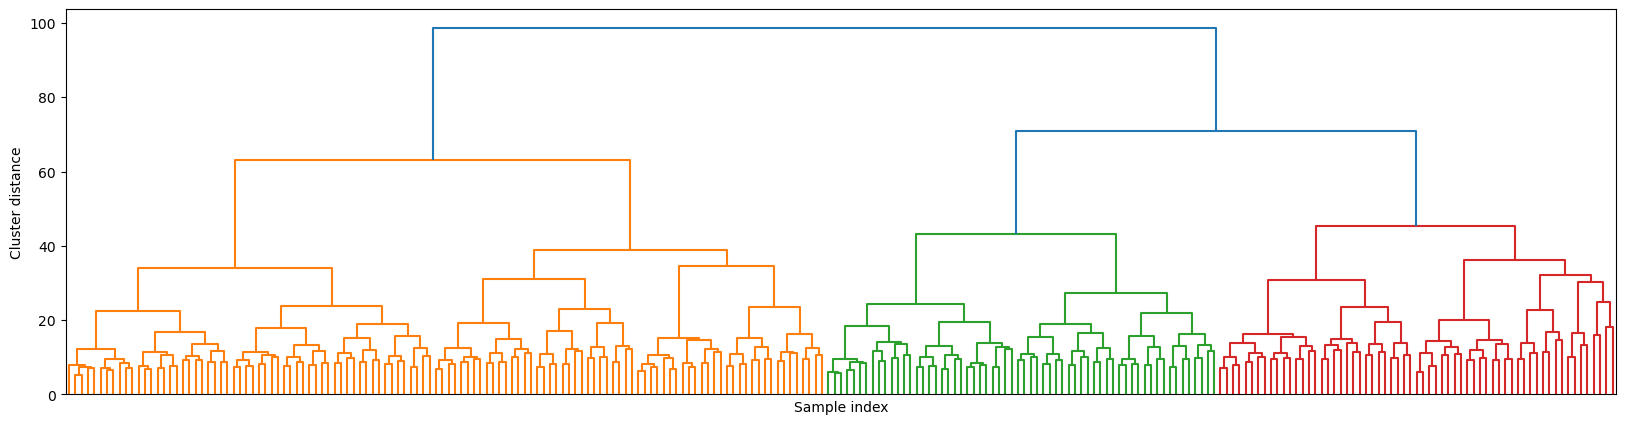

In [16]:
from scipy.cluster import hierarchy 
from scipy.spatial import distance_matrix 
from scipy.cluster.hierarchy import ward, dendrogram
linkage_array = ward(X)
# now we plot the dendrogram for the linkage_array
# containing the distances between clusters
plt.figure(figsize=(20, 5))
dendrogram(linkage_array, p=7, truncate_mode='level', no_labels=True)
plt.xlabel("Sample index")
plt.ylabel("Cluster distance")

#this is the dendogram 

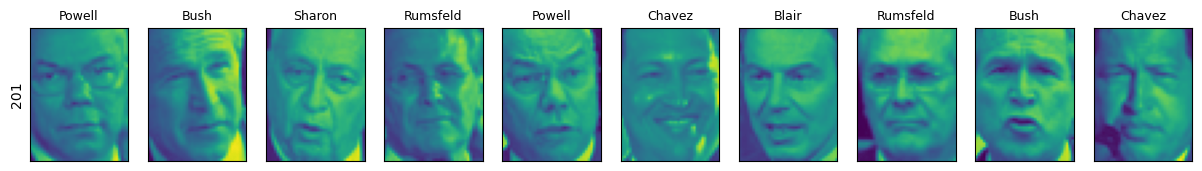

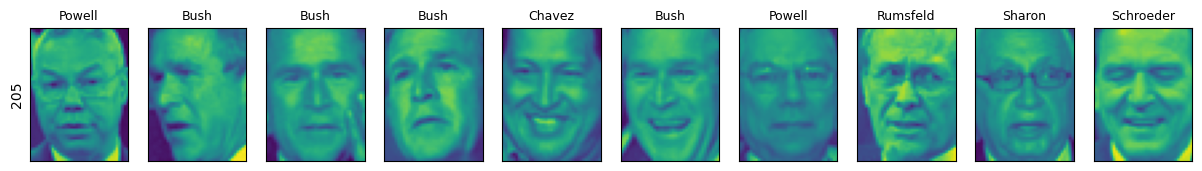

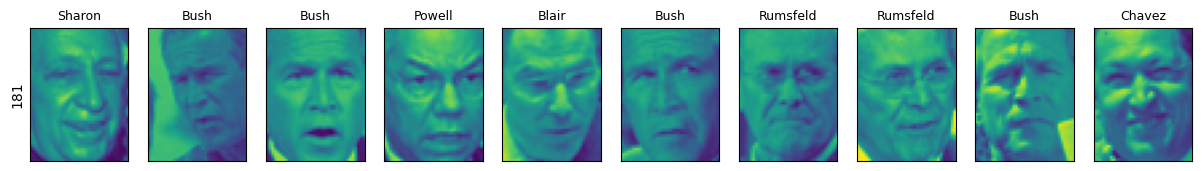

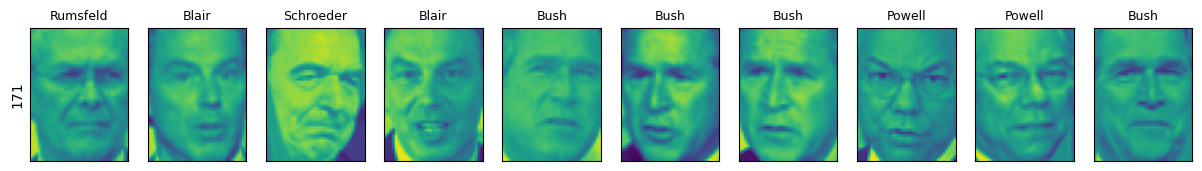

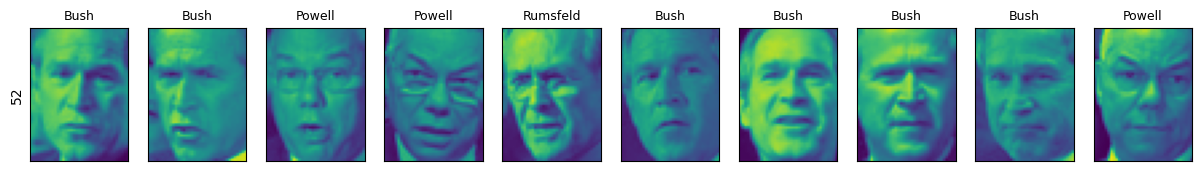

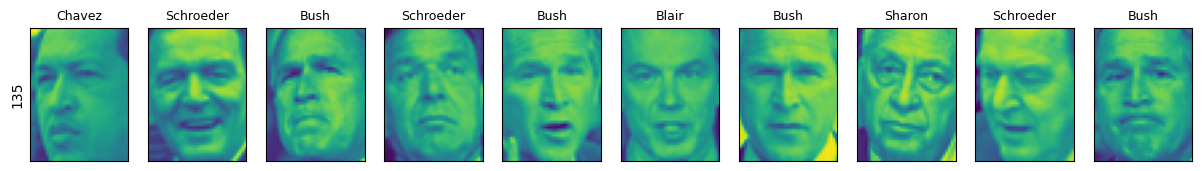

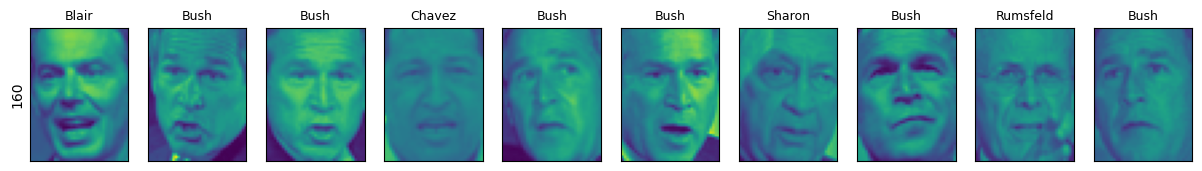

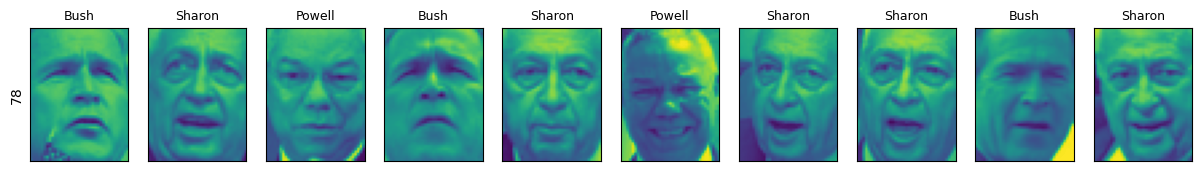

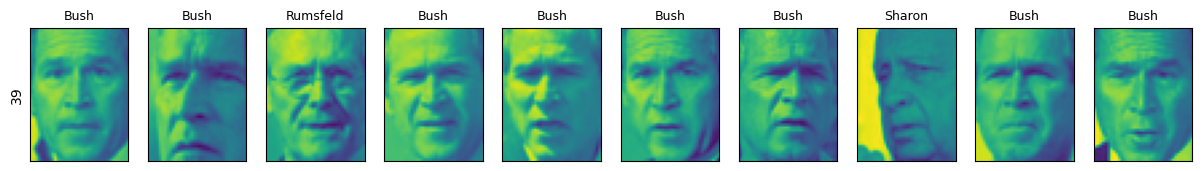

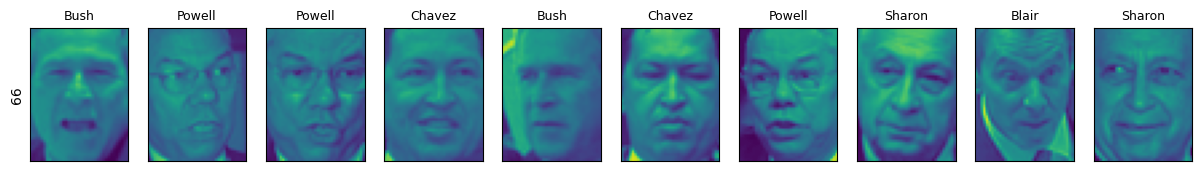

In [17]:
n_clusters = 10
for cluster in range(n_clusters):
 mask = labels_agg == cluster
 fig, axes = plt.subplots(1, 10, subplot_kw={'xticks': (), 'yticks': ()},
 figsize=(15, 8))
 axes[0].set_ylabel(np.sum(mask))
 for image, label, asdf, ax in zip(X[mask], y[mask],
    labels_agg[mask], axes):
    ax.imshow(image.reshape(image_shape), vmin=0, vmax=1)
    ax.set_title(lfw_people.target_names[label].split()[-1],
    fontdict={'fontsize': 9})
    
# The clusters are not distinct and too large to actually be homogenous 


cluster sizes agglomerative clustering: [23 50 30 52 72 35 36 45 39 50 22 28 39 36 62 27 42 19 29 25 22 39 22 22
 28 28 44 32 18 37 30 19 15 34 19 17 28  9 33 31]


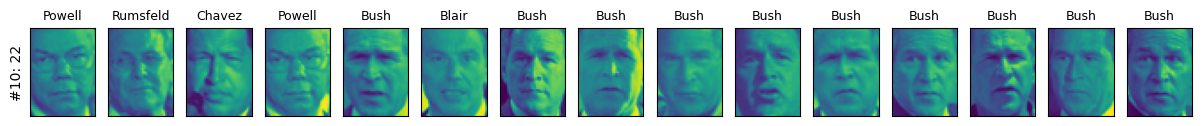

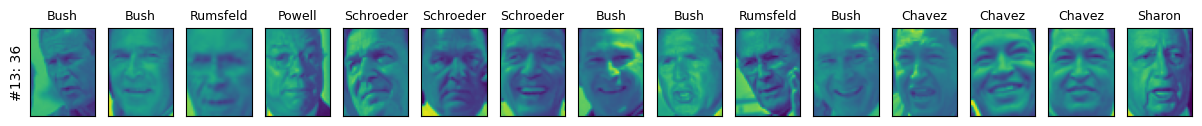

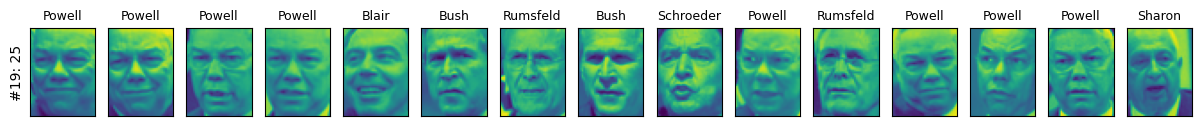

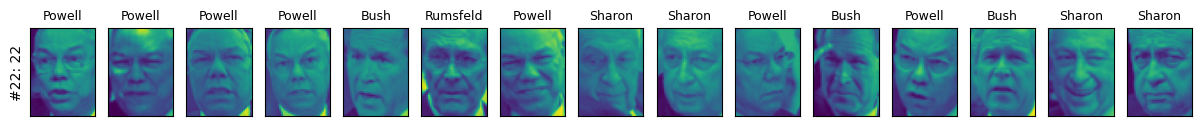

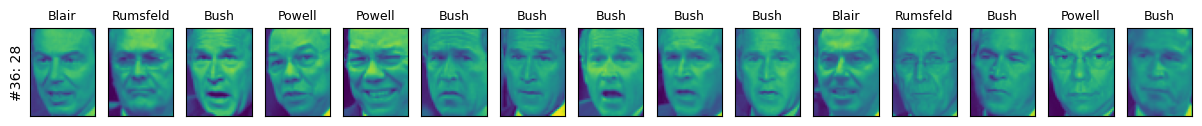

In [18]:
agglomerative = AgglomerativeClustering(n_clusters=40)
labels_agg = agglomerative.fit_predict(X)
print("cluster sizes agglomerative clustering: {}".format(np.bincount(labels_agg)))
n_clusters = 40
for cluster in [10, 13, 19, 22, 36]: # hand-picked "interesting" clusters
 mask = labels_agg == cluster
 fig, axes = plt.subplots(1, 15, subplot_kw={'xticks': (), 'yticks': ()},
 figsize=(15, 8))
 cluster_size = np.sum(mask)
 axes[0].set_ylabel("#{}: {}".format(cluster, cluster_size))
 for image, label, asdf, ax in zip(X[mask], y[mask],
    labels_agg[mask], axes):
    ax.imshow(image.reshape(image_shape), vmin=0, vmax=1)
    ax.set_title(lfw_people.target_names[label].split()[-1],
    fontdict={'fontsize': 9})
 for i in range(cluster_size, 15):
    axes[i].set_visible(False)
    
# To get more homogenous algorithm, we run the algorithm with 40 clusters. We can see some interesting clusters such as smiling 